# Workshop: Car Price Prediction (Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load data

In [2]:
df = pd.read_csv("../data/Cars.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Fix some columns (extract the meaning from the text)

In [4]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [5]:
df['owner'] = df['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

In [6]:
df['owner'].value_counts()

1    5289
2    2105
3     555
4     174
5       5
Name: owner, dtype: int64

In [7]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [8]:
#let's delete all rows with CNG and LPG
#because CNG and LPG use a different mileage system, i.e., km/kg which is different from kmpl for Diesel and Petrol
condCNG = df.fuel == 'CNG'
condLPG = df.fuel == 'LPG'
condCNG_index = np.where(condCNG | condLPG)  #retrieve the index
df.drop(condCNG_index[0], axis=0, inplace=True)

In [9]:
df.fuel.value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [11]:
df.mileage.loc[:5]

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
5    20.14 kmpl
Name: mileage, dtype: object

In [12]:
df.mileage = df.mileage.str.split(" ").str[0]

In [13]:
df.mileage.loc[:5]

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
5    20.14
Name: mileage, dtype: object

In [14]:
df.engine.loc[:5]

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
5    1197 CC
Name: engine, dtype: object

In [15]:
df.engine = df.engine.str.split(" ").str[0]

In [16]:
df.max_power = df.max_power.str.split(" ").str[0]

In [17]:
df = df.rename(columns={'name': 'brand'})

In [19]:
df.brand.loc[:5]

0           Maruti Swift Dzire VDI
1     Skoda Rapid 1.5 TDI Ambition
2         Honda City 2017-2020 EXi
3        Hyundai i20 Sportz Diesel
4           Maruti Swift VXI BSIII
5    Hyundai Xcent 1.2 VTVT E Plus
Name: brand, dtype: object

In [20]:
df.brand = df.brand.str.split(" ").str[0]  #a scientist choice, no right no wrong....

In [21]:
#I drop this because I don't know what is this....555
df = df.drop(columns=['torque'])

In [22]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,5.0


In [26]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [24]:
df.mileage = df.mileage.astype('float')
df.engine  =  df.engine.astype('float')
df.max_power = df.max_power.astype('float')

In [25]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

## 2. EDA

In [27]:
df.head(1)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248.0,74.0,5.0


### 2.1 Univariate - distribution plot

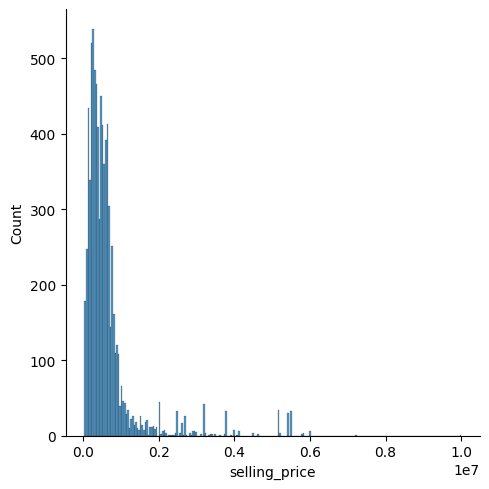

In [ ]:
sns.displot(data = df, x = 'selling_price')

### 2.2 Multivariate - bar plot

In [28]:
dis_col = ['year', 'brand', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
con_col = ['km_driven', 'mileage', 'engine', 'max_power']

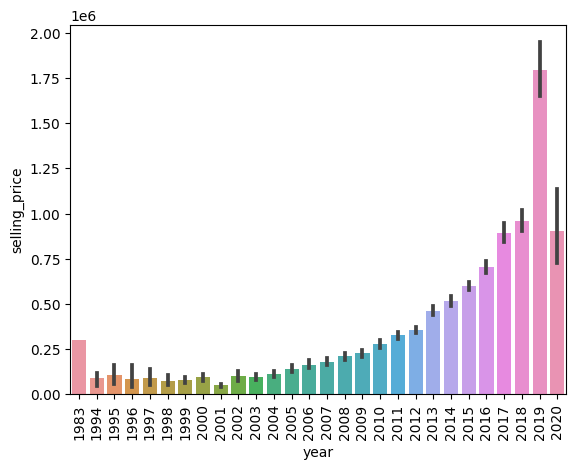

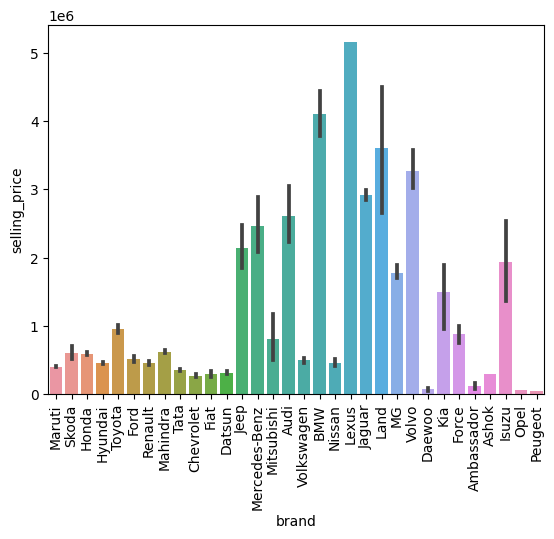

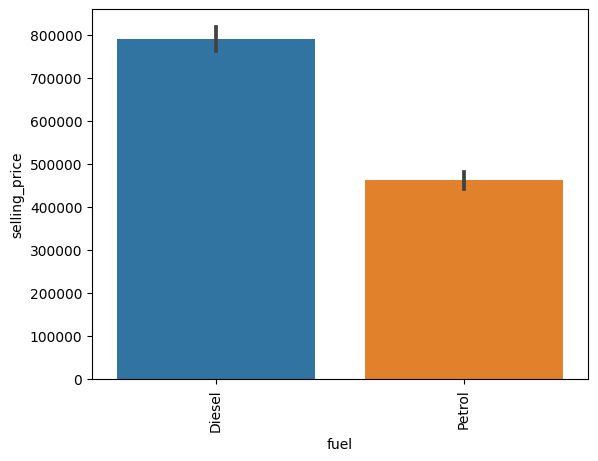

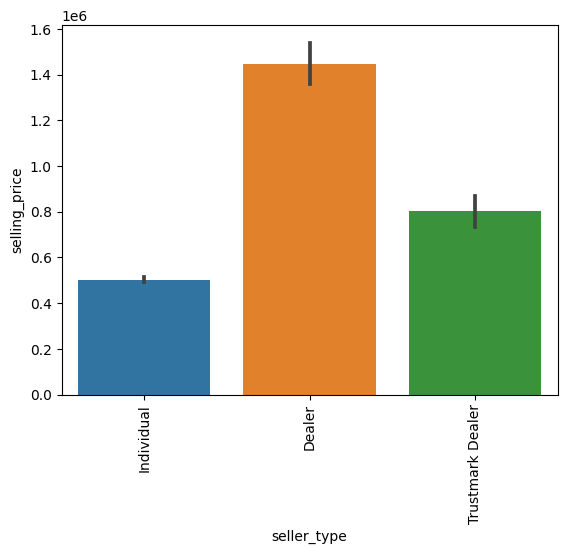

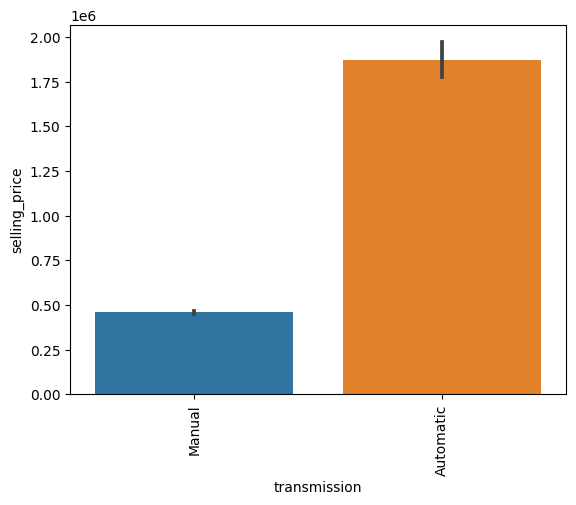

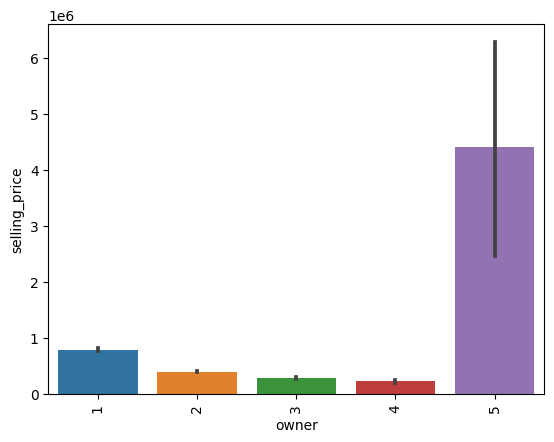

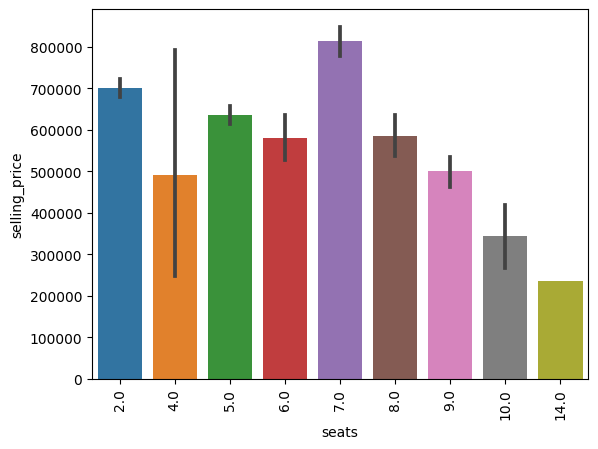

In [29]:
#plot the categorical columns
for col in dis_col:
    sns.barplot(x = df[col], y = df['selling_price'])  #since our y is continuous, we put x as our categories, and use bar plot
    plt.xticks(rotation=90)
    plt.show()

In [30]:
#we found out there are only five test drive cars...and they are "ridicously expensive"
#also we are not interested in predicting price of test_drive cars
#so let's delete them
cond = df.owner != 5
df = df[cond]

#another way
# cond = df.owner == 5
# index = np.where(cond)
# df = df.drop(index)

In [31]:
df.owner.value_counts()

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64

### 2.3 Multivariate - scatter plot

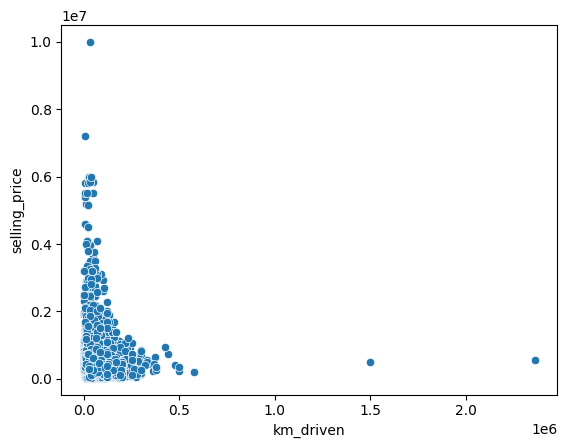

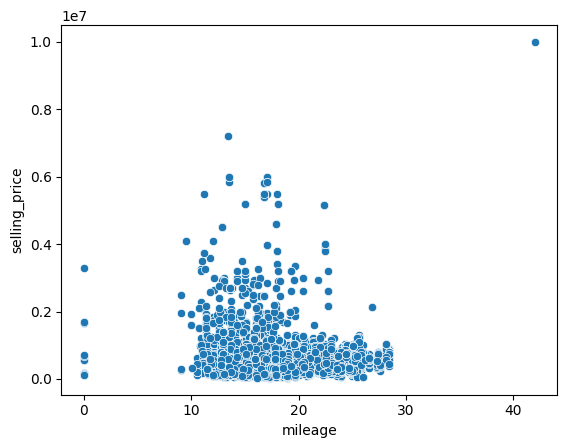

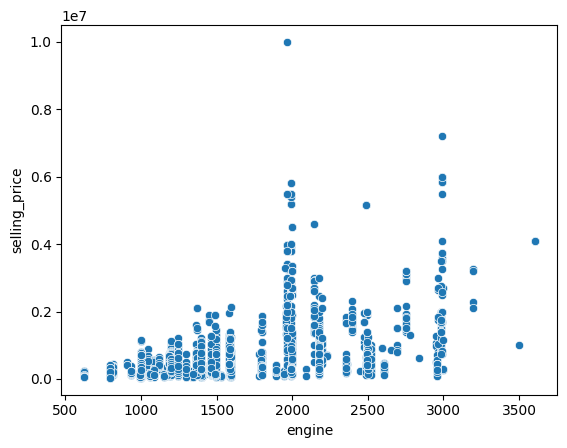

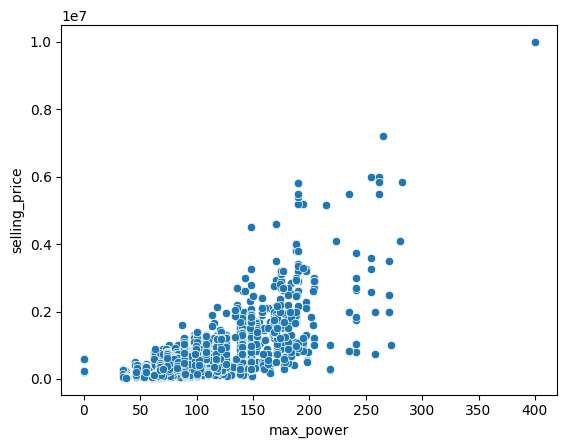

In [32]:
for col in con_col:
    sns.scatterplot(x=df[col], y=df['selling_price'])  #use scatter plot because both are continuous
    plt.show()

### 2.4 Correlation matrix

/var/folders/1v/1h7r513n71j7569x87spb4b40000gn/T/ipykernel_11667/3301813236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

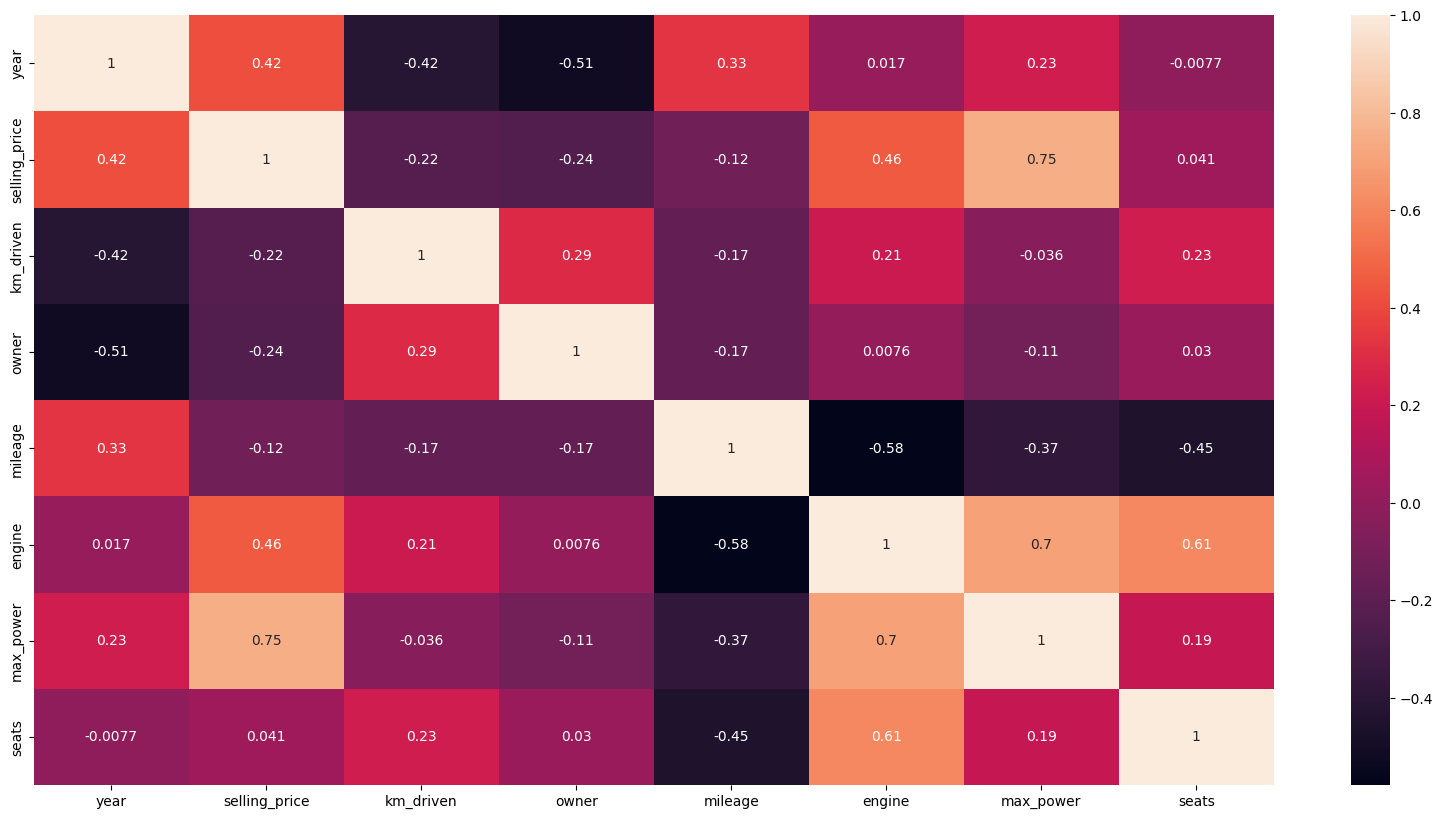

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

### 2.5 Predictive Power Score

/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/model_selection/_s

<Axes: xlabel='x', ylabel='y'>

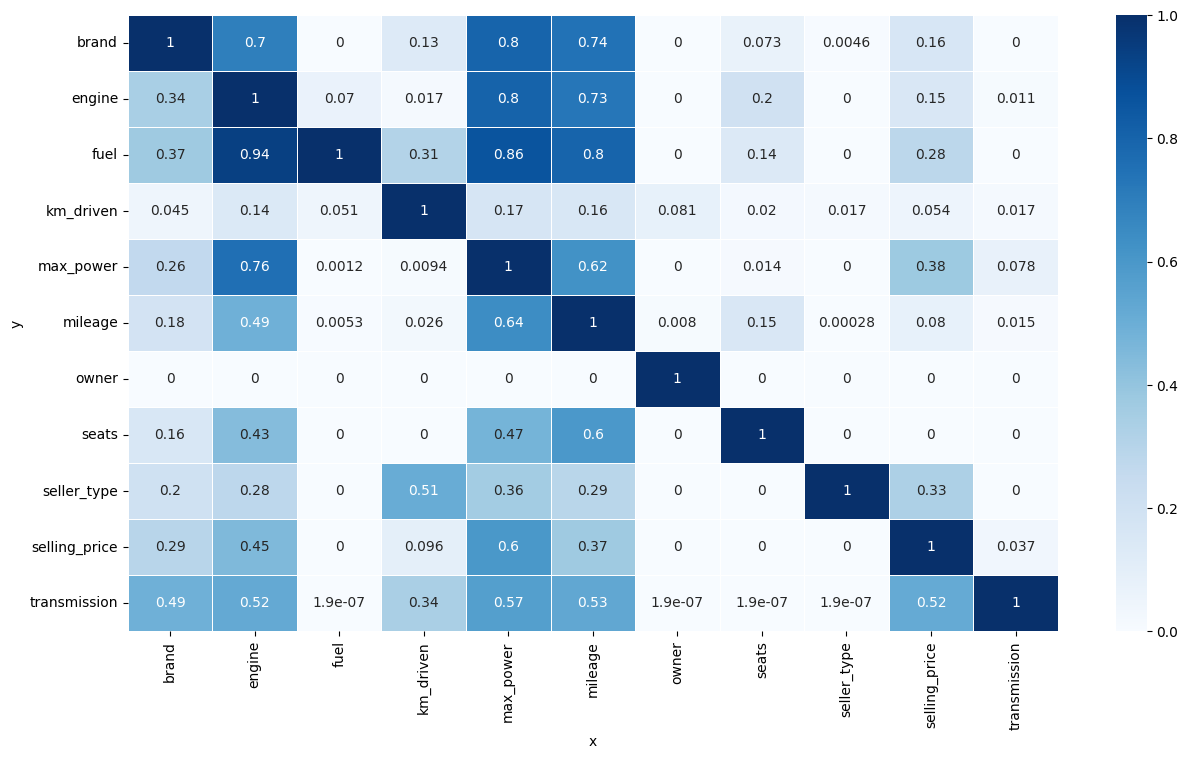

In [37]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['year'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)


### Conclusion:

We will use:   **year, km_driven, engine, max_power, brand, fuel, seller_type, transmission, owner, seats**

### Label encoding

In [38]:
#Encoding can be done before splitting anyway, because they won't affect data leakage
df = pd.get_dummies(df, columns=['brand'], drop_first=True)
#because you make some internal correlation....that is 30 columns are correlated to that last column

In [39]:
df['fuel'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1})

In [40]:
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

In [41]:
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

In [42]:
df.head()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,...,brand_Opel,brand_Peugeot,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500,1,0,1,23.40,1248.0,74.00,5.0,...,0,0,0,0,0,0,0,0,1,0
1,2014,370000,120000,1,0,2,21.14,1498.0,103.52,5.0,...,0,0,0,1,0,0,0,0,1,0
2,2006,158000,140000,0,0,3,17.70,1497.0,78.00,5.0,...,0,0,0,0,0,0,0,0,1,0
3,2010,225000,127000,1,0,1,23.00,1396.0,90.00,5.0,...,0,0,0,0,0,0,0,0,1,0
4,2007,130000,120000,0,0,1,16.10,1298.0,88.20,5.0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'brand_Ashok', 'brand_Audi',
       'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun',
       'brand_Fiat', 'brand_Force', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep',
       'brand_Kia', 'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_Mahindra',
       'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi',
       'brand_Nissan', 'brand_Opel', 'brand_Peugeot', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')

We will use:   **year, km_driven, engine, max_power, brand, fuel, seller_type, transmission, owner, seats**

## 3. Feature Engineering

Skipped

## 4. Feature Selection

In [44]:
X = df[['km_driven', 'engine', 'max_power', 'fuel', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
        'transmission', 'owner', 'seats']]

y = np.log(df['selling_price'])  #log transformation helps keep the prediction stable

assert X.ndim == 2
assert y.ndim == 1

X.shape, y.shape

((8028, 9), (8028,))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=999)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 9), (2409, 9), (5619,), (2409,))

## 5. Preprocessing

##### 5.1 Filling missing values

In [46]:
#double check that no missing values....
# X_train.isna().sum()     #fix engine, max_power, seats
# X_test.isna().sum()      #fix engine, max_power, seats
# y_train.isna().sum()   #no need to fix y_train
# y_test.isna().sum()    #no need to fix y_test

In [47]:
#since engine, max_power are continuous, we check whether to replace with mean() or median()
#for seats, we can replace with ratio or majority.
#note that we replace the testing set USING training statistics.

# sns.displot(X_train.max_power)
# X_train.max_power.mean(), X_train.max_power.median()  

#! median for engine, max_power

In [48]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

assert X_train['max_power'].isna().sum() == 0 
assert X_train['engine'].isna().sum() == 0 

In [49]:
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

assert X_test['max_power'].isna().sum() == 0 
assert X_test['engine'].isna().sum() == 0 

In [50]:
ratio = X_train.seats.value_counts(normalize=True)

#1. find how many are missing
cond          = X_train.seats.isna()
missing       = X_train.seats.isna().sum()
missing_index = X_train[cond].index

#np.where(cond) gives you the implicit index

#2. define the series
series = pd.Series(np.random.choice(list(ratio.index), p=list(ratio), 
                            size=missing), index = missing_index)

#3. fill the number with this series
X_train.seats.fillna(series, inplace=True)

# print(X_train.seats.value_counts(normalize=True))

X_train.seats.isna().sum()

0

In [51]:
#1. find how many are missing
cond          = X_test.seats.isna()
missing       = X_test.seats.isna().sum()
missing_index = X_test[cond].index

#np.where(cond) gives you the implicit index

#2. define the series
series = pd.Series(np.random.choice(list(ratio.index), p=list(ratio), 
                            size=missing), index = missing_index)

#3. fill the number with this series
X_test.seats.fillna(series, inplace=True)

# print(X_test.seats.value_counts(normalize=True))

X_test.seats.isna().sum()

0

In [52]:
X_train.isna().sum()
X_test.isna().sum()

km_driven                       0
engine                          0
max_power                       0
fuel                            0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission                    0
owner                           0
seats                           0
dtype: int64

### Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col_to_scale = ['km_driven', 'engine', 'max_power']

X_train.loc[:, col_to_scale] = sc.fit_transform(X_train.loc[:, col_to_scale]) #we scale all features, because all our features are continuous
X_test.loc[:,  col_to_scale] = sc.transform(X_test.loc[:, col_to_scale])

#we did not transform y_test or y_train

#after standardize, the mean should be zero; the std should be 1
for feature in col_to_scale:
    assert np.isclose(X_train.loc[:, feature].mean(), 0, atol = 0.0001)  #cannot == 0 because is near 0 not 0
    assert np.isclose(X_train.loc[:, feature].std(),  1, atol = 0.0001)
    #we don't need to assert for X_test, because we use training statistics to transform X_test, so it won't be mean0 std1

## 6. Modeling

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#models
lr, sv, rf, gb = LinearRegression(), SVR(), RandomForestRegressor(), GradientBoostingRegressor()

models = [lr, sv, rf, gb]
names  = ["lr", "sv", "rf", "gb"]

for idx, model in enumerate(models):
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, scoring='neg_mean_squared_error') #no need cv and scoring because their default is ok in our case
    print(f"{names[idx]} - Mean: {score.mean()}; Std: {score.std()}")
    

lr - Mean: -0.23546955506429476; Std: 0.043976704795369144
sv - Mean: -0.16483076617046244; Std: 0.0023244457082351156
rf - Mean: -0.0965598475940175; Std: 0.003351065946195178
gb - Mean: -0.12424032690823825; Std: 0.0034265263506931664


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth'   : [5, 10, None],
    'max_features': ['auto', 'log2'],
    'n_estimators': [5, 6, 99, 8, 9, ]
}

#3. define the base model
rf = RandomForestRegressor()

#4. create the gridsearch object
grid = GridSearchCV(estimator=rf,param_grid=param_grid,
                    n_jobs=-1,return_train_score=True,refit=True,
                    scoring="neg_mean_squared_error"
)

#5. run grid search
grid.fit(X_train, y_train)

/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/chaklam/Github/Machine-Learning/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 99, 8, 9]},
             return_train_score=True, scoring='neg_mean_squared_error')

## 7. Testing

In [56]:
pred_y = grid.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score #you can try absolute, root

print("MSE: ", mean_squared_error(y_test, pred_y))
print("R2: ", r2_score(y_test, pred_y))

MSE:  0.09390192175673846
R2:  0.8688548893462856


## 8. Feature Importance

In [58]:
grid.best_estimator_.feature_importances_ 

array([0.14958835, 0.20049701, 0.37116004, 0.04452802, 0.01813255,
       0.00088397, 0.08443975, 0.08608217, 0.04468814])

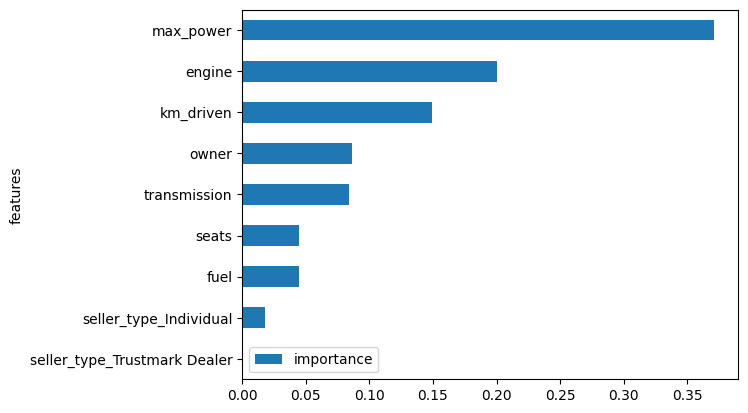

In [59]:
feature_importance = pd.DataFrame(list(X.columns), 
                                  columns=['features'])

feature_importance['importance'] = grid.best_estimator_.feature_importances_ 
feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features')
plt.show()

## 9. Inference

In [60]:
#please help me save the model here
import pickle

# save the model
filename = 'car_price.pkl' # pkl does not matter, you can do .everything
pickle.dump(grid, open(filename,'wb'))

# Load the model
loaded_grid=pickle.load(open(filename,'rb'))

# try predict X_test
pred = loaded_grid.predict(X_test)

# we have to np.exp to get back the real selling price
print(np.exp(pred))

#if you don't believe, try
#a = np.log(100)
#b = np.exp(a)
#print(b)

# if you have new data, then you fit again....but using loaded_grid
# which is a process of training more.....once you have more data....

# or another way is
# put all the dataset together, and train like it is new
    #this is possible ONLY if your dataset is not that big......


[199239.68481522 529712.82905189 497420.17907097 ... 145812.14709688
 195479.66055474 220927.9987583 ]
